In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ruptures as rpt
import pandas as pd
from pm4py.objects.petri_net.obj import PetriNet, Marking
from pm4py.objects.log.importer.xes import importer as xes_importer
from datetime import date
from pm4py.objects.petri_net.importer import importer as pnml_importer
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import seaborn as sns
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import pm4py
import os
import datetime
log = pm4py.read_xes("../../data/syntheticlogdoctorcase.xes")
from pm4py.algo.discovery.batches import algorithm
batches = algorithm.apply(log)
batchespm4py = set()
for act_res in batches:
    if act_res[0][0]=='doctor test':
        print("activity: "+act_res[0][0]+" resource: "+str(act_res[0][1]))
        print("number of distinct batches: "+str(act_res[1]))
        for batch_type in act_res[2]:
            print(batch_type, len(act_res[2][batch_type]))
            for batch_info in act_res[2][batch_type]:
                print(datetime.datetime.fromtimestamp(batch_info[0]),'to ', datetime.datetime.fromtimestamp(batch_info[1]))
                batchespm4py.add(datetime.datetime.fromtimestamp(batch_info[1]))

parsing log, completed traces ::   0%|          | 0/2000 [00:00<?, ?it/s]

activity: doctor test resource: 5
number of distinct batches: 87
Simultaneous 87
2020-01-23 14:30:00 to  2020-01-23 14:30:00
2020-01-26 15:30:00 to  2020-01-26 15:30:00
2020-01-27 17:30:00 to  2020-01-27 17:30:00
2020-01-31 14:30:00 to  2020-01-31 14:30:00
2020-01-31 16:30:00 to  2020-01-31 16:30:00
2020-02-01 16:30:00 to  2020-02-01 16:30:00
2020-02-02 18:30:00 to  2020-02-02 18:30:00
2020-02-05 16:30:00 to  2020-02-05 16:30:00
2020-02-06 17:30:00 to  2020-02-06 17:30:00
2020-02-07 15:30:00 to  2020-02-07 15:30:00
2020-02-07 16:30:00 to  2020-02-07 16:30:00
2020-02-08 15:30:00 to  2020-02-08 15:30:00
2020-02-08 16:30:00 to  2020-02-08 16:30:00
2020-02-09 15:30:00 to  2020-02-09 15:30:00
2020-02-11 16:30:00 to  2020-02-11 16:30:00
2020-02-12 13:30:00 to  2020-02-12 13:30:00
2020-02-12 16:30:00 to  2020-02-12 16:30:00
2020-02-13 15:30:00 to  2020-02-13 15:30:00
2020-02-15 14:30:00 to  2020-02-15 14:30:00
2020-02-16 15:30:00 to  2020-02-16 15:30:00
2020-02-17 18:30:00 to  2020-02-17 18:3

In [3]:
targetdatedataframe = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\syntheticlogdoctortarget.csv')
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date
targetdatedataframe['WaitingTime']=pd.to_timedelta(targetdatedataframe['WaitingTime'])

In [4]:
targetdatedataframe


date  tokenproduced  tokenconsumed  tokenleft       WaitingTime  \
0    2020-01-22             12             10          2   1 days 14:00:00   
1    2020-01-23             14             12          4   4 days 13:00:00   
2    2020-01-24             13             10          7   9 days 11:30:00   
3    2020-01-25             13             12          8  17 days 03:00:00   
4    2020-01-26             21             16         13  27 days 09:30:00   
..          ...            ...            ...        ...               ...   
104  2020-05-05              0              0         18 163 days 20:00:00   
105  2020-05-06              0              0         18 181 days 20:00:00   
106  2020-05-07              0              0         18 199 days 20:00:00   
107  2020-05-08              0              0         18 217 days 20:00:00   
108  2020-05-09              0             18          0 227 days 07:00:00   

     Count                                 consumedByUserList  
0       12  ['1968', '1442', '1429', '1282', '1188', '1133...  
1       16  ['1905', '1560', '1288', '1101', '1092', '1032...  
2       17  ['1685', '1450', '1417', '860', '776', '452', ...  
3       20  ['1739', '1554', '1448', '1239', '1156', '988'...  
4       29  ['1980', '1910', '1889', '1570', '1519', '1479...  
..     ...                                                ...  
104     18                                                 []  
105     18                                                 []  
106     18                                                 []  
107     18                                                 []  
108     18  ['1940', '1750', '1658', '1617', '1381', '1304...  

[109 rows x 7 columns]

[4, 7, 9, 11, 14, 16, 19, 21, 32, 34, 37, 39, 44, 48, 54, 58, 60, 63, 67, 69, 71, 73, 75, 78, 81, 84, 87, 89, 91, 95, 98, 100, 109]


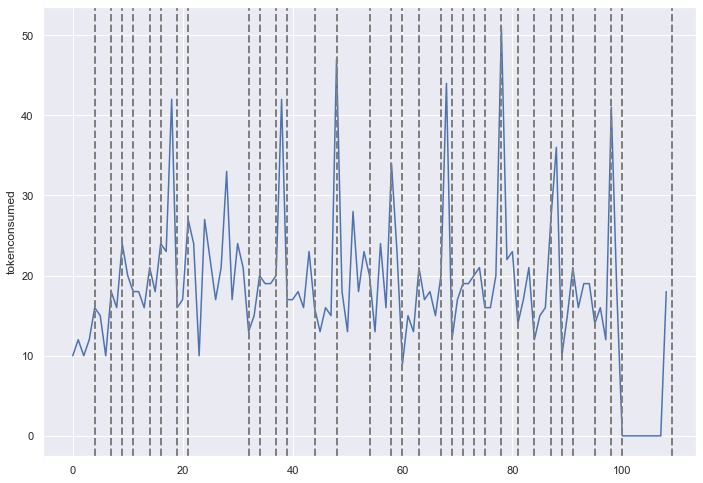

In [53]:
algo_python = rpt.Pelt(model="l2", jump=1, min_size=1).fit(
    targetdatedataframe[['tokenconsumed']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenconsumed")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

Importing plotly failed. Interactive plots will not work.
00:11:51 - cmdstanpy - INFO - Chain [1] start processing
00:11:52 - cmdstanpy - INFO - Chain [1] done processing


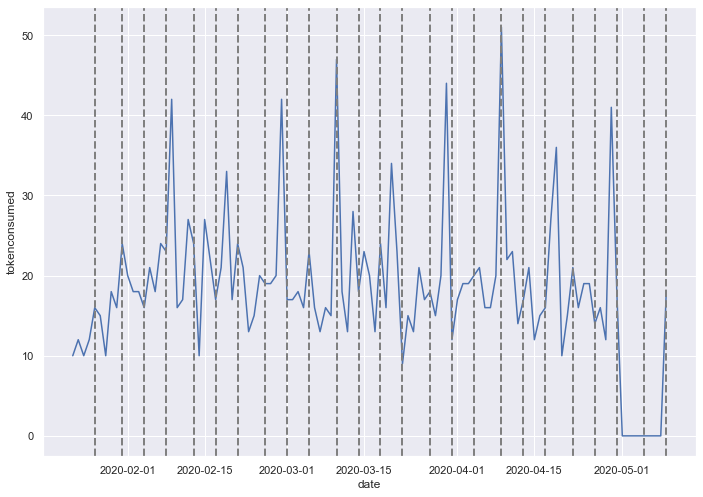

In [59]:
targetdatedataframe.sort_values(by='date')
from prophet.plot import add_changepoints_to_plot
from prophet import Prophet

m = Prophet(changepoint_range=1,changepoint_prior_scale=0.05)
forecast=m.fit(targetdatedataframe[['date','tokenconsumed']].rename({'date': 'ds','tokenconsumed':'y'}, axis=1))
#future = m.make_future_dataframe(periods=366)
#forecast = m.predict(future)
sns.lineplot(data=targetdatedataframe, x="date", y="tokenconsumed")
resultm.changepoints
for cp in m.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='chunkmean'>

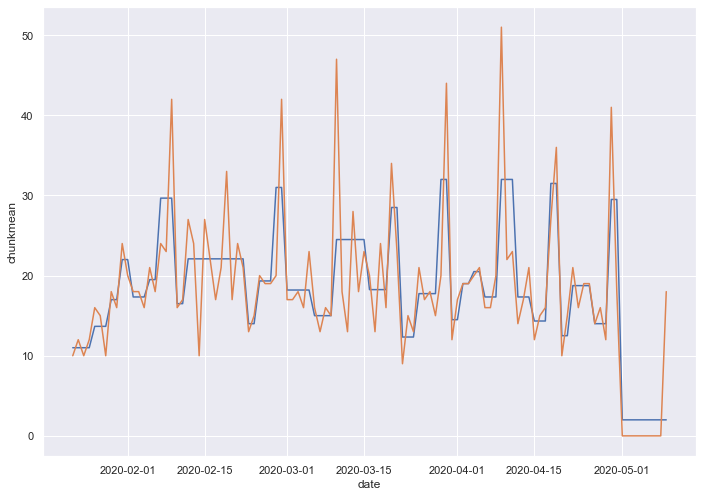

In [54]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
sns.set(rc={'figure.figsize':(11.7,8.27)})
targetdatedataframe['chunkmean'] = 0
targetdatedataframe['chunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['chunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenconsumed'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['chunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='chunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenconsumed')


[5, 25, 50, 60, 65, 90, 95, 100, 120, 125, 145, 165, 170, 195, 200, 205, 210, 215, 220, 240, 250]


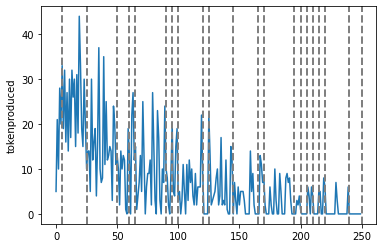

In [10]:
algo_python = rpt.Pelt(model="l2").fit(
    targetdatedataframe[['tokenproduced']]
)  # written in pure python

result = algo_python.predict(1)
print(result)
sns.lineplot(data=targetdatedataframe,x=targetdatedataframe.index, y="tokenproduced")
for cp in result:
    plt.axvline(cp, c='gray', ls='--', lw=2)

In [58]:
def categorise(row):   
    if row['chunkmean']*1.25 < row['tokenconsumed'] and row['tokenconsumed']>1 :
        return 1
    return 0

targetdatedataframe['chunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['chunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['chunkbatched']>0].sort_values(by='date')
batcheddf

10


date  tokenproduced  tokenconsumed  tokenleft       WaitingTime  \
18   2020-02-09             24             42         10 300 days 12:00:00   
28   2020-02-19             23             33         24 251 days 14:00:00   
38   2020-02-29             18             42         21 430 days 05:30:00   
43   2020-03-05             23             23         26 222 days 19:00:00   
48   2020-03-10             27             47         15 370 days 22:30:00   
56   2020-03-18             26             24         29 232 days 08:30:00   
68   2020-03-30             27             44         23 352 days 05:30:00   
78   2020-04-09             28             51         13 392 days 04:30:00   
98   2020-04-29             25             41         18 318 days 08:00:00   
108  2020-05-09              0             18          0 227 days 07:00:00   

     Count                                 consumedByUserList  chunkmean  \
18      52  ['1978', '1954', '1837', '1815', '1778', '1768...  29.666667   
28      57  ['1975', '1882', '1637', '1608', '1545', '1540...  22.090909   
38      63  ['1903', '1865', '1848', '1816', '1804', '1789...  31.000000   
43      49  ['1890', '1884', '1790', '1623', '1527', '1457...  18.200000   
48      62  ['1900', '1864', '1771', '1741', '1718', '1676...  24.500000   
56      53  ['1982', '1852', '1797', '1723', '1686', '1668...  18.250000   
68      67  ['1985', '1932', '1916', '1860', '1851', '1841...  32.000000   
78      64  ['1990', '1969', '1928', '1927', '1898', '1892...  32.000000   
98      59  ['1921', '1873', '1863', '1857', '1813', '1699...  29.500000   
108     18  ['1940', '1750', '1658', '1617', '1381', '1304...   2.000000   

     chunkindex  chunkbatched  
18            7             1  
28            9             1  
38           12             1  
43           13             1  
48           15             1  
56           16             1  
68           20             1  
78           25             1  
98           32             1  
108          33             1

C:\Users\bittu\anaconda3\envs\env-IDS2020\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


<AxesSubplot:xlabel='date', ylabel='pchunkmean'>

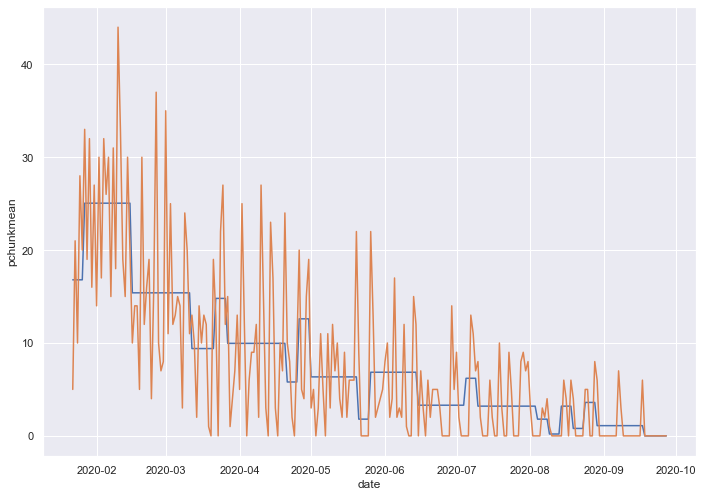

In [14]:
#sns.histplot(data=targetdatedataframe, x="batched")
#sns.lineplot(data=targetdatedataframe,x='date', y="tokenconsumed")
targetdatedataframe['pchunkmean'] = 0
targetdatedataframe['pchunkindex'] = 1
start=0
i=1
for index in result:
    targetdatedataframe['pchunkmean'].iloc[start:index]=targetdatedataframe[ ['tokenproduced'] ].iloc[start:index].mean(axis=0)[0]
    targetdatedataframe['pchunkindex'].iloc[start:index]=i
    i=i+1
    start=index

f, ax = plt.subplots()
sns.lineplot(data=targetdatedataframe, x='date', y='pchunkmean')
sns.lineplot(data=targetdatedataframe, x='date', y='tokenproduced')


In [15]:
def categorise(row):   
    if row['pchunkmean'] < row['tokenproduced'] and row['tokenproduced']>1 :
        return 1
    return 0

targetdatedataframe['pchunkbatched'] = targetdatedataframe.apply(lambda row: categorise(row), axis=1)
print(len(targetdatedataframe[targetdatedataframe['pchunkbatched']>0]))
batcheddf=targetdatedataframe[targetdatedataframe['pchunkbatched']>0].sort_values(by='date')
batcheddf

99


date  tokenproduced  tokenconsumed  tokenleft       WaitingTime  \
1    2020-01-23             21              0         26  10 days 06:00:00   
3    2020-01-25             28              2         58  80 days 00:00:00   
4    2020-01-26             20              3         75 140 days 23:30:00   
5    2020-01-27             33             10         98 216 days 23:00:00   
7    2020-01-29             32             14        127 405 days 07:30:00   
..          ...            ...            ...        ...               ...   
219  2020-08-28              8              2         11  27 days 13:30:00   
220  2020-08-29              6              1         16  29 days 09:00:00   
229  2020-09-07              7              3          5  10 days 21:30:00   
230  2020-09-08              3              2          6   7 days 12:00:00   
239  2020-09-17              6              2          6  19 days 19:00:00   

     Count                                 consumedByUserList  chunkmean  \
1       26                                                 []       1.80   
3       60                                    ['1059', '859']       1.80   
4       78                              ['653', '163', '108']       1.80   
5      108  ['1848', '1708', '1675', '1411', '898', '616',...      11.30   
7      141  ['1935', '1819', '1572', '1554', '1462', '1147...      11.30   
..     ...                                                ...        ...   
219     13                                    ['1601', '791']       3.60   
220     17                                            ['203']       1.35   
229      8                              ['1604', '223', '79']       1.35   
230      8                                    ['1422', '305']       1.35   
239      8                                     ['988', '207']       1.35   

     chunkindex  chunkbatched  pchunkmean  pchunkindex  pchunkbatched  
1             1             0       16.80            1              1  
3             1             1       16.80            1              1  
4             1             1       16.80            1              1  
5             2             0       25.05            2              1  
7             2             1       25.05            2              1  
..          ...           ...         ...          ...            ...  
219          19             0        3.60           19              1  
220          20             0        1.10           20              1  
229          20             1        1.10           20              1  
230          20             1        1.10           20              1  
239          20             1        1.10           20              1  

[99 rows x 13 columns]

In [45]:
realbatchesdf = pd.read_csv(r'C:\Users\bittu\RWTH\Thesis\realbatchdf.csv')
realbatchesdf['date']=pd.to_datetime(realbatchesdf['date']).dt.date
realbatchesdf

date
0  2020-03-10
1  2020-05-09
2  2020-02-29
3  2020-04-29
4  2020-04-19
5  2020-03-20
6  2020-02-19
7  2020-02-09
8  2020-03-30
9  2020-04-09

In [ ]:
Shared - 19
Pm4py- 40
Statistical- 32
Original- 10


In [46]:
pd.set_option('display.max_rows',310)
merged=pd.merge(df,realbatchesdf,on='date',how='inner')
print('PM4PY TP/P:',merged['date'].nunique()/df['date'].nunique())
merged=pd.merge(batcheddf,realbatchesdf,on='date',how='inner')
print('Statistical TP/P:',merged['date'].nunique()/batcheddf['date'].nunique())

PM4PY TP/P: 0.10101010101010101
Statistical TP/P: 0.9090909090909091


date
0  2020-03-10
1  2020-05-09
2  2020-02-29
3  2020-04-29
4  2020-04-19
5  2020-03-20
6  2020-02-19
7  2020-02-09
8  2020-03-30
9  2020-04-09

In [42]:
pd.merge(batcheddf,realbatchesdf,on='date',how='inner')

date  tokenproduced  tokenconsumed  tokenleft       WaitingTime  \
0  2020-02-09             24             42         10 300 days 12:00:00   
1  2020-02-19             23             33         24 251 days 14:00:00   
2  2020-02-29             18             42         21 430 days 05:30:00   
3  2020-03-10             27             47         15 370 days 22:30:00   
4  2020-03-20             19             34         17 286 days 14:30:00   
5  2020-03-30             27             44         23 352 days 05:30:00   
6  2020-04-09             28             51         13 392 days 04:30:00   
7  2020-04-19             26             36         19 279 days 23:30:00   
8  2020-04-29             25             41         18 318 days 08:00:00   
9  2020-05-09              0             18          0 227 days 07:00:00   

   Count                                 consumedByUserList  chunkmean  \
0     52  ['1978', '1954', '1837', '1815', '1778', '1768...  22.533333   
1     57  ['1975', '1882', '1637', '1608', '1545', '1540...  22.533333   
2     63  ['1903', '1865', '1848', '1816', '1804', '1789...  21.000000   
3     62  ['1900', '1864', '1771', '1741', '1718', '1676...  20.550000   
4     51  ['1926', '1858', '1751', '1748', '1687', '1663...  20.550000   
5     67  ['1985', '1932', '1916', '1860', '1851', '1841...  22.000000   
6     64  ['1990', '1969', '1928', '1927', '1898', '1892...  22.000000   
7     55  ['1962', '1844', '1793', '1792', '1746', '1702...  19.100000   
8     59  ['1921', '1873', '1863', '1857', '1813', '1699...  19.100000   
9     18  ['1940', '1750', '1658', '1617', '1381', '1304...   2.000000   

   chunkindex  chunkbatched  
0           3             1  
1           3             1  
2           4             1  
3           5             1  
4           5             1  
5           7             1  
6           7             1  
7           8             1  
8           8             1  
9           9             1

In [21]:
targetdatedataframe['date']=pd.to_datetime(targetdatedataframe['date']).dt.date